Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importing the Dataset

In [2]:
from google.colab import files

uploaded = files.upload()

Saving restaurant_sales_data.csv to restaurant_sales_data.csv


Loading The Dataset

In [3]:
df = pd.read_csv('restaurant_sales_data.csv')
df.head()


,Order ID,Customer ID,Category,Item,Price,Quantity,Order Total,Order Date,Payment Method
0,ORD_705844,CUST_092,Side Dishes,Side Salad,3.0,1.0,3.0,2023-12-21,Credit Card
1,ORD_338528,CUST_021,Side Dishes,Mashed Potatoes,4.0,3.0,12.0,2023-05-19,Digital Wallet
2,ORD_443849,CUST_029,Main Dishes,Grilled Chicken,15.0,4.0,60.0,2023-09-27,Credit Card
3,ORD_630508,CUST_075,Drinks,NaN,NaN,2.0,5.0,2022-08-09,Credit Card
4,ORD_648269,CUST_031,Main Dishes,Pasta Alfredo,12.0,4.0,48.0,2022-05-15,Cash


Data Exploration

I, Shape of the Dataset

In [4]:
print("Shape of the dataset:", df.shape)

Shape of the dataset: (17534, 9)


II, Column Names

In [5]:
print("Columns in the dataset:")
print(df.columns.tolist())

Columns in the dataset:
['Order ID', 'Customer ID', 'Category', 'Item', 'Price', 'Quantity', 'Order Total', 'Order Date', 'Payment Method']


III, Data Types & Non-Null Values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17534 entries, 0 to 17533
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        17534 non-null  object 
 1   Customer ID     17534 non-null  object 
 2   Category        17534 non-null  object 
 3   Item            15776 non-null  object 
 4   Price           16658 non-null  float64
 5   Quantity        17104 non-null  float64
 6   Order Total     17104 non-null  float64
 7   Order Date      17534 non-null  object 
 8   Payment Method  16452 non-null  object 
dtypes: float64(3), object(6)
memory usage: 1.2+ MB


IV, Summary Statistics (Numeric Columns)

In [7]:
df.describe()

,Price,Quantity,Order Total
count,16658.000000,17104.000000,17104.000000
mean,6.586325,3.014149,19.914494
std,4.834652,1.414598,18.732549
min,1.000000,1.000000,1.000000
25%,3.000000,2.000000,7.500000
50%,5.000000,3.000000,15.000000
75%,7.000000,4.000000,25.000000
max,20.000000,5.000000,100.000000


Check Missing Values & Duplicates

I, Missing Values

In [8]:
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
Order ID             0
Customer ID          0
Category             0
Item              1758
Price              876
Quantity           430
Order Total        430
Order Date           0
Payment Method    1082
dtype: int64


II, Duplicate Rows

In [9]:
print("Number of duplicate rows:", df.duplicated().sum())


Number of duplicate rows: 0


III, Handle Missing Values

In [10]:
# Identify numeric and categorical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

print("Numeric Columns:", numeric_cols.tolist())
print("Categorical Columns:", categorical_cols.tolist())

Numeric Columns: ['Price', 'Quantity', 'Order Total']
Categorical Columns: ['Order ID', 'Customer ID', 'Category', 'Item', 'Order Date', 'Payment Method']


IV, Fill Missing Values

In [11]:
# Fill missing values for numeric columns
for col in numeric_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Fill missing values for categorical columns
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

/tmp/ipython-input-2337865582.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-2337865582.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

V, verify Missing Values Again

In [12]:
print("Missing values after cleaning:")
print(df.isnull().sum())

Missing values after cleaning:
Order ID          0
Customer ID       0
Category          0
Item              0
Price             0
Quantity          0
Order Total       0
Order Date        0
Payment Method    0
dtype: int64


VI, Remove Duplicate Rows (if any)

In [13]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)

print("Shape after removing duplicates:", df.shape)

Shape after removing duplicates: (17534, 9)


VII, Removing The Unwanted Datas

In [14]:
# Drop irrelevant columns
df.drop(['Order ID', 'Customer ID', 'Order Date'], axis=1, inplace=True)

# Check remaining columns
df.head()

,Category,Item,Price,Quantity,Order Total,Payment Method
0,Side Dishes,Side Salad,3.0,1.0,3.0,Credit Card
1,Side Dishes,Mashed Potatoes,4.0,3.0,12.0,Digital Wallet
2,Main Dishes,Grilled Chicken,15.0,4.0,60.0,Credit Card
3,Drinks,Pasta Alfredo,5.0,2.0,5.0,Credit Card
4,Main Dishes,Pasta Alfredo,12.0,4.0,48.0,Cash


Data Visualization (EDA)

I, Distribution of Order Total (TARGET)

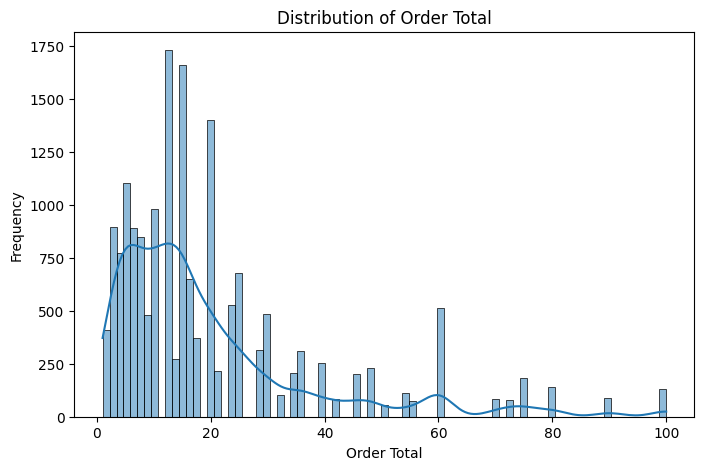

In [15]:
plt.figure(figsize=(8,5))
sns.histplot(df['Order Total'], kde=True)
plt.title('Distribution of Order Total')
plt.xlabel('Order Total')
plt.ylabel('Frequency')
plt.show()

II, Category vs Order Total

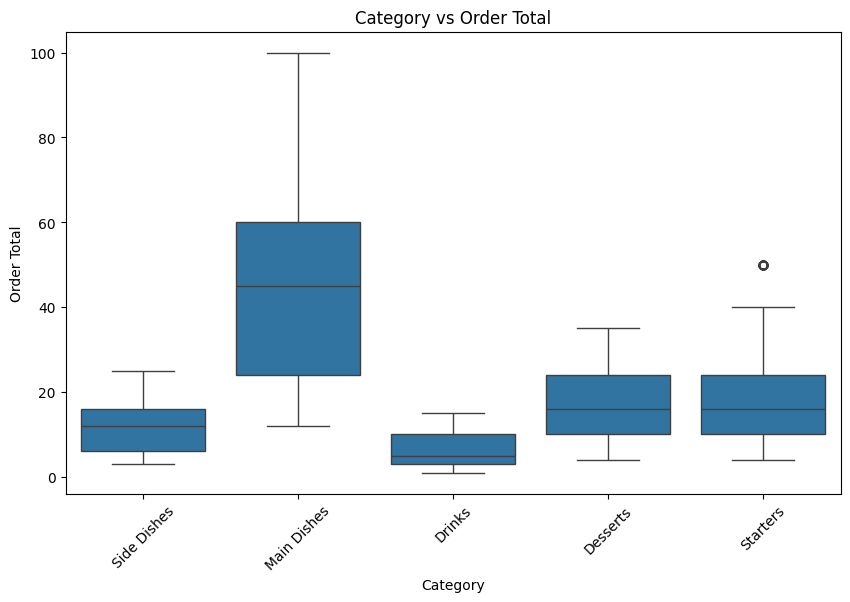

In [16]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Category', y='Order Total', data=df)
plt.title('Category vs Order Total')
plt.xticks(rotation=45)
plt.show()

III, Payment Method vs Order Total

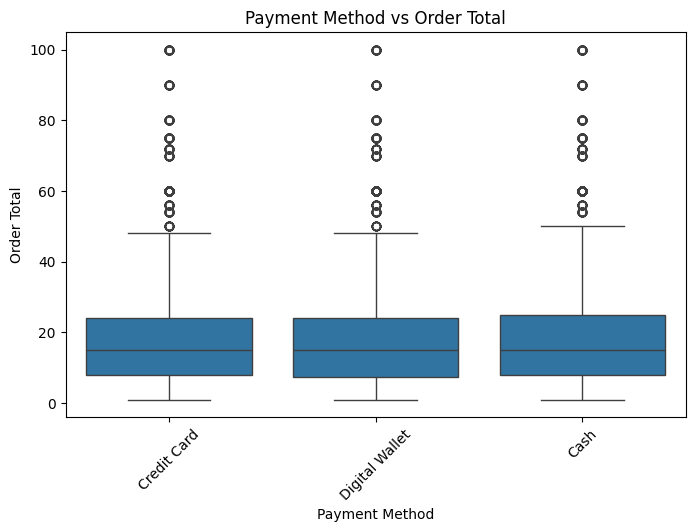

In [17]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Payment Method', y='Order Total', data=df)
plt.title('Payment Method vs Order Total')
plt.xticks(rotation=45)
plt.show()

IV, Price vs Order Total

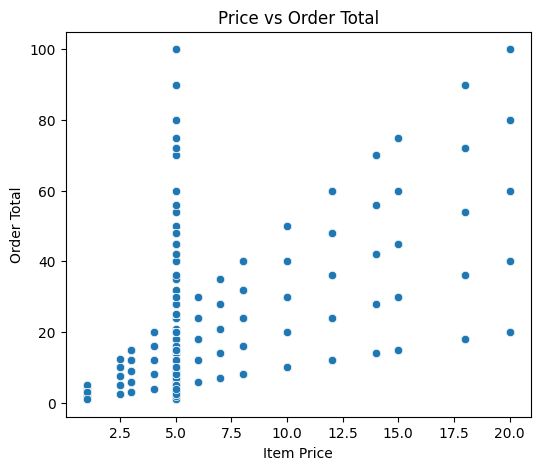

In [18]:
plt.figure(figsize=(6,5))
sns.scatterplot(x='Price', y='Order Total', data=df)
plt.title('Price vs Order Total')
plt.xlabel('Item Price')
plt.ylabel('Order Total')
plt.show()

V, Quantity vs Order Total

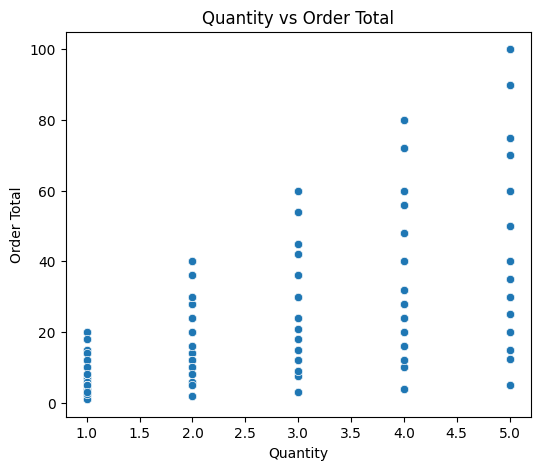

In [19]:
plt.figure(figsize=(6,5))
sns.scatterplot(x='Quantity', y='Order Total', data=df)
plt.title('Quantity vs Order Total')
plt.xlabel('Quantity')
plt.ylabel('Order Total')
plt.show()

Identify Target & Features + Encoding

I, Identify Target Variables And Features

In [20]:
# Target variable
target = 'Order Total'

# Features
features = df.columns.drop(target)

print("Target:", target)
print("Features:", features.tolist())

Target: Order Total
Features: ['Category', 'Item', 'Price', 'Quantity', 'Payment Method']


II, Identify Categorical Columns

In [21]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_cols.tolist())

Categorical Columns: ['Category', 'Item', 'Payment Method']


III, One-Hot Encoding

In [22]:
# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, drop_first=True)

# Check encoded data
df_encoded.head()


,Price,Quantity,Order Total,Category_Drinks,Category_Main Dishes,Category_Side Dishes,Category_Starters,Item_Brownie,Item_Cheese Fries,Item_Cheesecake,...,Item_Orange Juice,Item_Pasta Alfredo,Item_Salmon,Item_Side Salad,Item_Steak,Item_Sweet Potato Fries,Item_Vegetarian Platter,Item_Water,Payment Method_Credit Card,Payment Method_Digital Wallet
0,3.0,1.0,3.0,False,False,True,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
1,4.0,3.0,12.0,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,15.0,4.0,60.0,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,5.0,2.0,5.0,True,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
4,12.0,4.0,48.0,False,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


IV, Separate X and y

In [23]:
# Features (X) and Target (y)
X = df_encoded.drop(target, axis=1)
y = df_encoded[target]

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (17534, 33)
y shape: (17534,)


V, Feature Scaling

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Train–Test Split & Model Training

I, Import Required ML Modules



In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

II, Train-Test Split

In [26]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (14027, 33)
Testing set size: (3507, 33)


III, Model Building – Linear Regression

In [27]:
# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

IV, Make Predictions on Test Data

In [28]:
# Predict on test data
y_pred = model.predict(X_test)

V, Model Evaluation

In [29]:
# Evaluate the model
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Mean Squared Error (MSE): 51.844661873359996
R² Score: 0.855144772022517


Make Prediction from New Input

I, Create Sample New Order Input

In [30]:
# Sample new restaurant order (you can change values later)
new_order = {
    'Category': 'Main Course',
    'Item': 'Chicken Biryani',
    'Price': 250.0,
    'Quantity': 2,
    'Payment Method': 'Credit Card'
}

II, Convert Input to DataFrame

In [31]:
# Convert dictionary to DataFrame
new_df = pd.DataFrame([new_order])

new_df

,Category,Item,Price,Quantity,Payment Method
0,Main Course,Chicken Biryani,250.0,2,Credit Card


III, Combine with Original Data

In [32]:
# Combine with original dataset (without target)
df_temp = pd.concat([df.drop(target, axis=1), new_df], ignore_index=True)

IV, One-Hot Encode the Combined Data

In [33]:
# One-hot encode
df_temp_encoded = pd.get_dummies(df_temp, drop_first=True)

V, Align Encoded Columns with Training Data

In [34]:
# Match column order with training features
df_temp_encoded = df_temp_encoded.reindex(
    columns=X.columns,
    fill_value=0
)

VI, Scale the New Input

In [35]:
# Scale the new input
new_input_scaled = scaler.transform(df_temp_encoded.tail(1))

VII, Predict Order Total

In [36]:
# Predict order total
predicted_sales = model.predict(new_input_scaled)

print("🍽️ Predicted Order Total:", round(predicted_sales[0], 2))

🍽️ Predicted Order Total: 362.98


Deployment On Gradio

Installing gradio

In [37]:
!pip install gradio

In [38]:
import gradio as gr
def predict_order_total(Category, Item, Price, Quantity, Payment_Method):

    # Create input dictionary
    input_data = {
        'Category': Category,
        'Item': Item,
        'Price': float(Price),
        'Quantity': float(Quantity),
        'Payment Method': Payment_Method
    }

    # Convert to DataFrame
    input_df = pd.DataFrame([input_data])

    # Combine with original dataset (without target)
    df_temp = pd.concat([df.drop(target, axis=1), input_df], ignore_index=True)

    # One-hot encode
    df_temp_encoded = pd.get_dummies(df_temp, drop_first=True)

    # Align columns with training data
    df_temp_encoded = df_temp_encoded.reindex(columns=X.columns, fill_value=0)

    # Scale input
    scaled_input = scaler.transform(df_temp_encoded.tail(1))

    # Predict
    prediction = model.predict(scaled_input)

    return round(prediction[0], 2)


In [39]:
inputs = [
    gr.Dropdown(df['Category'].unique().tolist(), label="Food Category"),
    gr.Dropdown(df['Item'].unique().tolist(), label="Menu Item"),
    gr.Number(label="Item Price"),
    gr.Number(label="Quantity Ordered"),
    gr.Dropdown(df['Payment Method'].unique().tolist(), label="Payment Method")
]

In [40]:
output = gr.Number(label="Predicted Order Total")

In [41]:
gr.Interface(
    fn=predict_order_total,
    inputs=inputs,
    outputs=output,
    title=" Restaurant Sales Predictor",
    description="Enter order details to predict the total bill amount using Machine Learning."
).launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://5d29a260c7eeadc0e9.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
